In [40]:
import matplotlib.pyplot as plt
import datetime
import time

In [59]:
timestamps = form_timelist()
workday = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44000, 62000, 115000, 161000, 245000, 250000, 185000, 175000, 130000, 125000, 105000, 100000, 101000, 102000, 102000, 101000, 107000, 112000, 122000, 126000, 140000, 154000, 185000, 215000, 255000, 237000, 173000, 145000, 125000, 100000, 86000, 72000, 62000, 48000, 35000, 0, 0, 0]
weekday = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30000, 40000, 50000, 55000, 72000, 82000, 85000, 95000, 80000, 95000, 80000, 95000, 100000, 105000, 107000, 115000, 118000, 122000, 125000, 130000, 123000, 121000, 123000, 125000, 125000, 120000, 105000, 102000, 100000, 92000, 86000, 75000, 80000, 60000, 50000, 0, 0, 0]

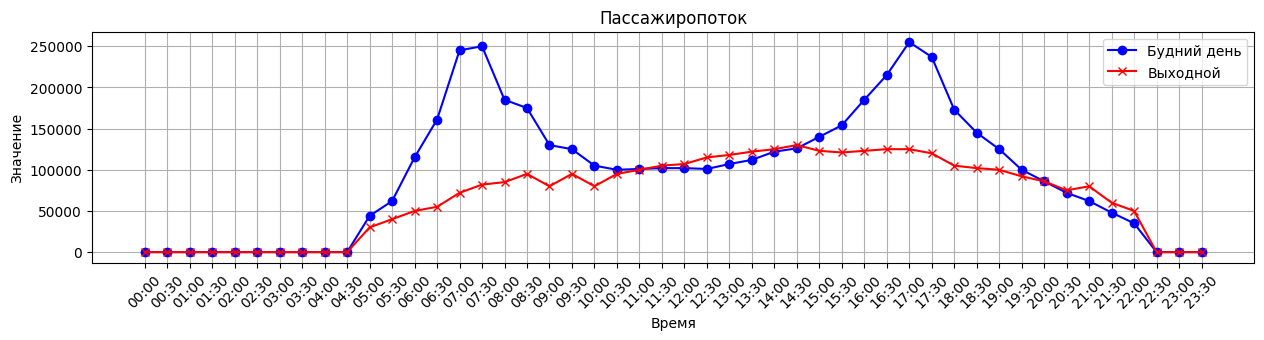

In [94]:
plt.figure(figsize=(15, 3))
plt.plot(timestamps, workday, label='Будний день', color='b', marker='o')
plt.plot(timestamps, weekday, label='Выходной', color='r', marker='x')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Пассажиропоток')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [86]:
def form_timelist():
    # задаем начальную точку
    current_time = datetime.time(0, 0)

    timestamps = []
    periods = 0

    # каждые полчаса записываем в список 
    while periods < 48:
        timestamps.append(current_time.strftime('%H:%M'))
        current_time = (datetime.datetime.combine(datetime.date(1, 1, 1), current_time) + datetime.timedelta(minutes=30)).time()
        periods+=1

    return timestamps

In [83]:
def fill_plot_values():
    
    work = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44000, 62000, 115000, 161000, 245000, 250000, 185000, 175000, 130000, 125000, 105000, 100000, 101000, 102000, 102000, 101000, 107000, 112000, 122000, 126000, 140000, 154000, 185000, 215000, 255000, 237000, 173000, 145000, 125000, 100000, 86000, 72000, 62000, 48000, 35000, 0, 0, 0]
    rest = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30000, 40000, 50000, 55000, 72000, 82000, 85000, 95000, 80000, 95000, 80000, 95000, 100000, 105000, 107000, 115000, 118000, 122000, 125000, 130000, 123000, 121000, 123000, 125000, 125000, 120000, 105000, 102000, 100000, 92000, 86000, 75000, 80000, 60000, 50000, 0, 0, 0]
    
    return work, rest

In [96]:
def coef(date, time_start="00:00", time_end="23:30"):

    timestamps = form_timelist()
    workday, weekday = fill_plot_values()

    # в зависимости от дня недели выбираем патерн (выходные или будни)
    if date.weekday in (5, 6):
        values = weekday
    else:
        values = workday
    
    # ищем индексы с временем
    index_start = timestamps.index(time_start.strftime('%H:%M'))
    index_end = timestamps.index(time_end.strftime('%H:%M'))

    return sum(values[index_start:index_end + 1]) / sum(values)

In [103]:
date = datetime.datetime.strptime("2022-12-08", "%Y-%m-%d").date()
time_start = datetime.datetime.strptime("19:00", "%H:%M").time()
time_end = datetime.datetime.strptime("10:00", "%H:%M").time()

coef(date, time_start, time_end)

0.0